In [62]:
import praw
from psaw import PushshiftAPI
import datetime as dt
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import make_interp_spline, BSpline, interp1d
import numpy as np

In [39]:
with open("config.json", "r") as config_file:
    config = json.load(config_file)

In [40]:
reddit = praw.Reddit(**config['auth'])
psapi = PushshiftAPI(reddit)

In [4]:
sub_names = ','.join(config['subreddits'])

In [5]:
start_date = int(dt.datetime(2019, 1, 1).timestamp())
end_date = int(dt.datetime(2020, 9, 23).timestamp())

In [6]:
results_dict = {}
for keyword in config['keywords']:
    gen = psapi.search_comments(
        q=keyword, 
        subreddit='researchchemicals',
        after=start_date,
        before=end_date
        #aggs="created_utc",
        #frequency="day",
    )

    results_dict[keyword] = list(gen)

In [7]:
len(results_dict['eutylone'])

320

In [41]:
BIN_MINUTE = 60
BIN_HOUR = BIN_MINUTE * 60
BIN_DAY = BIN_HOUR * 24
BIN_WEEK = BIN_DAY * 7
BIN_MONTH = BIN_WEEK * 4

<Figure size 432x288 with 0 Axes>

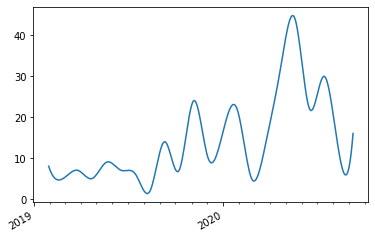

In [67]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

times = [c.created_utc for c in results_dict['eutylone']]
bin_boundaries = range(start_date, end_date, BIN_MONTH)
bins, bin_times, _ = plt.hist(times, bins=bin_boundaries)
bin_times = bin_times[1:] #discard first boundary
plt.clf() #don't show histogram

f = interp1d(bin_times, bins, kind='cubic')
times_smooth = np.linspace(bin_times[0], bin_times[-1], num=300, endpoint=True)


bin_dates = list(map(dt.datetime.fromtimestamp, times_smooth))

fig, ax = plt.subplots()

ax.plot(bin_dates, f(times_smooth))

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

fig.autofmt_xdate()

plt.show()